In [1]:
import numpy as np
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_photo(photo):
    plt.imshow(photo, cmap=plt.cm.gray, vmin=0, vmax=1, interpolation='none')
    plt.axis("off")
    plt.show()
    
def plot_basis_function(basis_function):
    x = np.linspace(-4, 4, 1001)
    plt.plot(x, basis_function(x))
    plt.axis([-4, 4, -0.5, 1.5])
    plt.xlabel("x")
    plt.ylabel("phi(x)")
    plt.title("Basis Function")
    plt.show()
    
def enhance(image, factor, coordinates, basis_function):
    # Zooms in on a section of a 256x256 grayscale image
    # 
    #   image          - 256x256 numpy array of pixel intensities
    #   factor         - integer specifying the zoom factor 
    #   coordinates    - tuple of 4 integers specifying bounding box for zoom region
    #   basis function - function that takes a 1D numpy array and returns value of 
    #                    the basis function at the points specified in the array
    
    x1min = coordinates[0]
    x1max = coordinates[1]
    x2min = coordinates[2]
    x2max = coordinates[3]
    
    x1 = np.linspace(0, 255.5, factor*256)[factor*x1min:factor*x1max]   
    x2 = np.linspace(0, 255.5, factor*256)[factor*x2min:factor*x2max]
    subimage = image[x1min:x1max, x2min:x2max]
    X1, X2 = np.meshgrid(x1, x2)
    
    x1_original = np.linspace(0, 255, 256)[x1min:x1max]   
    x2_original = np.linspace(0, 255, 256)[x2min:x2max]
            
    # Note: this is far from an efficient way of doing the 
    #   interpolation when the basis function has many zeros
    #   but it matches the theory more directly than an efficient implementation
    y = np.zeros(X1.shape)
    for j, x1_val in enumerate(x1_original):
        for k, x2_val in enumerate(x2_original):
            y += subimage[j, k]*basis_function(X1 - x1_val)*basis_function(X2 - x2_val)
    return y

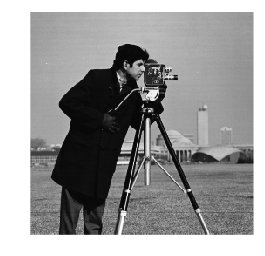

In [3]:
# original image 

cameraman = color.rgb2gray(io.imread('cameraman.png'))
plot_photo(cameraman)

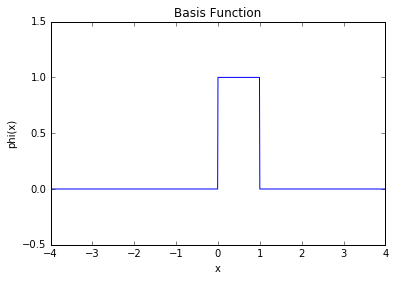

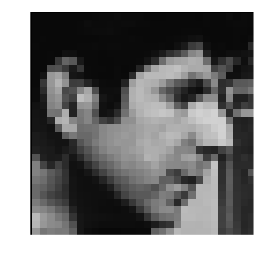

In [4]:
# Enhance face region using zero order hold interpolation 

x1_min = 50
x1_max = 80
x2_min = 105
x2_max = 135
coordinates = (x1_min, x1_max, x2_min, x2_max)

zoom = 8

def zoh(x):
    return (np.zeros(x.shape) <= x)*(x < np.ones(x.shape))

plot_basis_function(zoh)

result = enhance(cameraman, zoom, coordinates, zoh)
plot_photo(result.T)

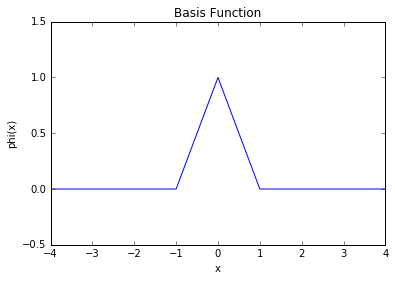

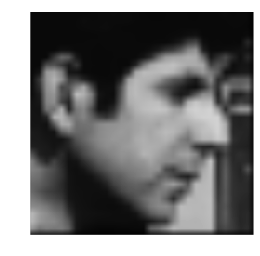

In [5]:
# Enhance using linear interpolation 

def linear(x):
    return np.maximum(np.zeros(x.shape), 1-np.abs(x))

plot_basis_function(linear)

result = enhance(cameraman, zoom, coordinates, linear)
plot_photo(result.T)

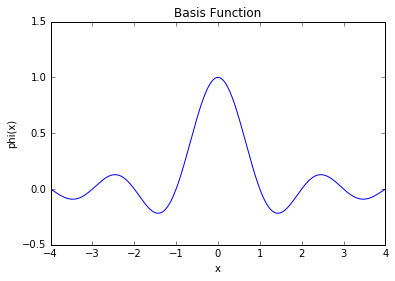

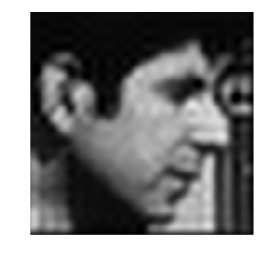

In [6]:
# Enhance using sinc interpolation

def sinc(x):
    return np.sinc(x)

plot_basis_function(sinc)

result = enhance(cameraman, zoom, coordinates, sinc)
plot_photo(result.T)